## import necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

## Read dataset

In [8]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")
df = pd.read_csv('survey (1).csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Mining

In [9]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                  Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:44:51           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    NaN            NaN   NaN   
min                     NaN -1.726000e+03    NaN            NaN   NaN   
25%                     NaN  2.700000e+01    NaN            NaN   NaN   
50%                     NaN  3.100000e+01    NaN            NaN   NaN   
75%                     NaN  3.600000e+01    NaN            NaN   NaN   
max                     NaN  1.000000e+11    NaN            NaN   NaN   

       self_employed family_history treatment work_interfere no_employees  \
count           1241 

####  Key Insights Extraction

In [10]:
#  Prevalence of Mental Health Interference
interference_counts = df['work_interfere'].value_counts(normalize=True) * 100
print("\nPercentage of Work Interference:")
print(interference_counts)


Percentage of Work Interference:
work_interfere
Sometimes    46.733668
Never        21.407035
Rarely       17.386935
Often        14.472362
Name: proportion, dtype: float64


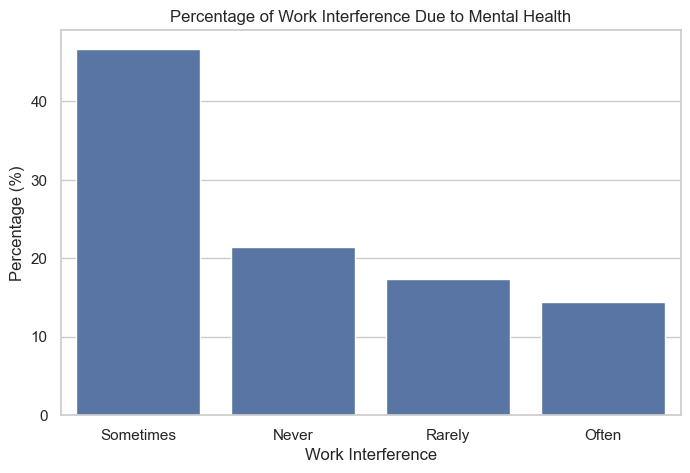

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=interference_counts.index, y=interference_counts.values)
plt.title('Percentage of Work Interference Due to Mental Health')
plt.xlabel('Work Interference')
plt.ylabel('Percentage (%)')
plt.show()

#### Treatment Seeking Behavior

In [12]:
treatment_counts = df['treatment'].value_counts(normalize=True) * 100
print("\nPercentage Seeking Treatment:")
print(treatment_counts)


Percentage Seeking Treatment:
treatment
Yes    50.595711
No     49.404289
Name: proportion, dtype: float64


#### Cross-tabulation with Family History

In [13]:
treatment_vs_family = pd.crosstab(df['treatment'], df['family_history'], normalize='index') * 100
print("\nTreatment vs. Family History (%):")
print(treatment_vs_family)


Treatment vs. Family History (%):
family_history         No        Yes
treatment                           
No              79.581994  20.418006
Yes             42.700157  57.299843


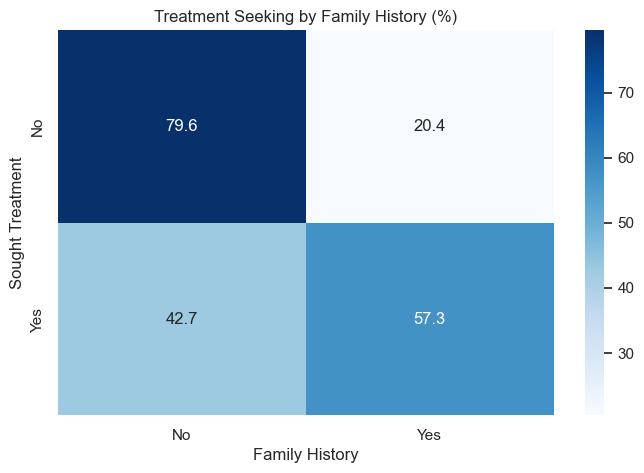

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(treatment_vs_family, annot=True, cmap='Blues', fmt='.1f')
plt.title('Treatment Seeking by Family History (%)')
plt.xlabel('Family History')
plt.ylabel('Sought Treatment')
plt.show()

#### Workplace Support Perception

In [15]:
mental_consequence_counts = df['mental_health_consequence'].value_counts(normalize=True) * 100
print("\nPerceived Mental Health Consequence (%):")
print(mental_consequence_counts)


Perceived Mental Health Consequence (%):
mental_health_consequence
No       38.919778
Maybe    37.887212
Yes      23.193010
Name: proportion, dtype: float64


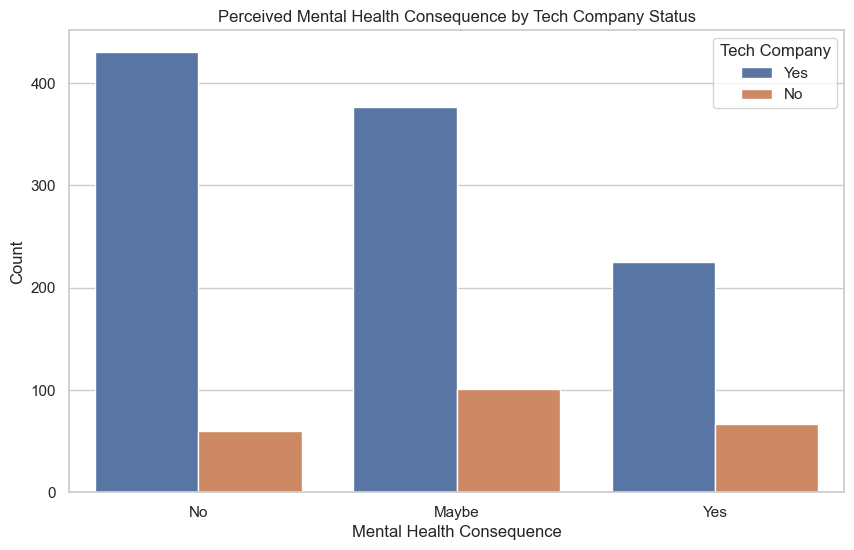

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_health_consequence', hue='tech_company', data=df)
plt.title('Perceived Mental Health Consequence by Tech Company Status')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')
plt.legend(title='Tech Company')
plt.show()

#### Correlation Analysis


Correlation Matrix:
                                Age  work_interfere  treatment  \
Age                        1.000000       -0.027425   0.027860   
work_interfere            -0.027425        1.000000  -0.035881   
treatment                  0.027860       -0.035881   1.000000   
family_history             0.035203        0.017420   0.377918   
mental_health_consequence  0.042128       -0.024745   0.030221   
no_employees              -0.045109        0.025174  -0.050114   

                           family_history  mental_health_consequence  \
Age                              0.035203                   0.042128   
work_interfere                   0.017420                  -0.024745   
treatment                        0.377918                   0.030221   
family_history                   1.000000                   0.028196   
mental_health_consequence        0.028196                   1.000000   
no_employees                    -0.053635                  -0.011370   

           

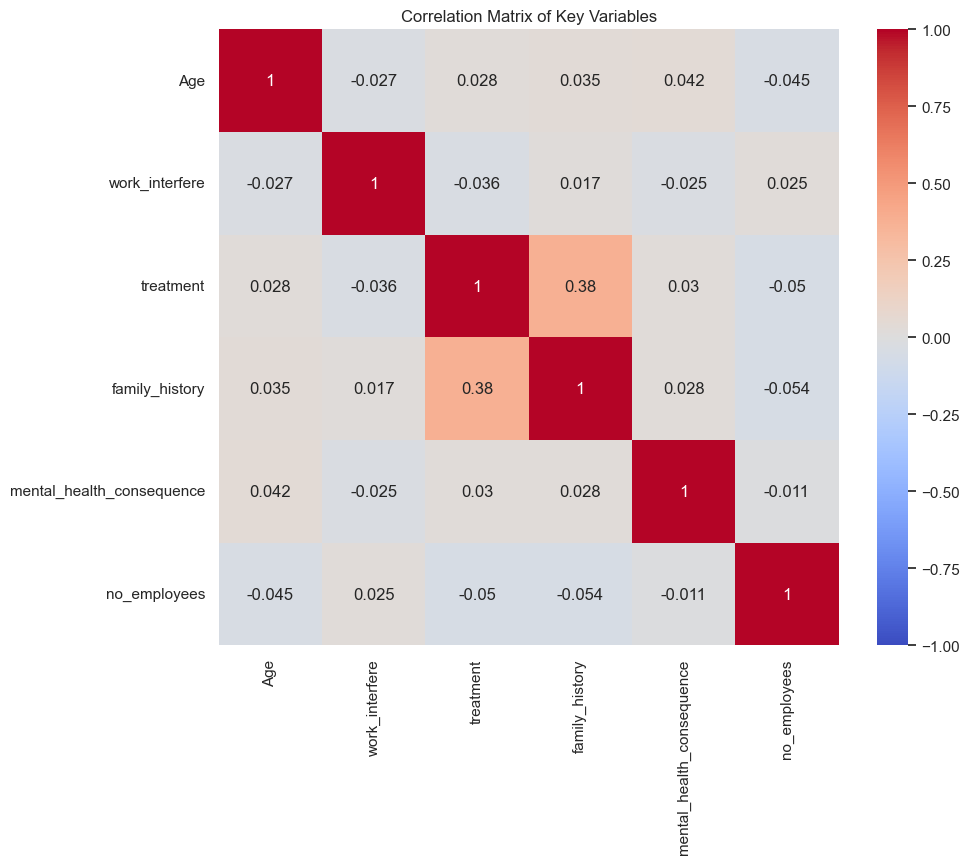

In [17]:
# Encode categorical variables for correlation
le = LabelEncoder()
encoded_df = df[['Age', 'work_interfere', 'treatment', 'family_history', 
                 'mental_health_consequence', 'no_employees']].copy()

# Encode categorical columns
for col in ['work_interfere', 'treatment', 'family_history', 'mental_health_consequence', 'no_employees']:
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlation matrix
corr_matrix = encoded_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()

#### Clustering

In [18]:
# Select features for clustering
cluster_features = encoded_df[['Age', 'work_interfere', 'treatment', 'family_history']]
cluster_features = cluster_features.dropna()

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_features, kmeans.labels_))

#### Plot Elbow Curve

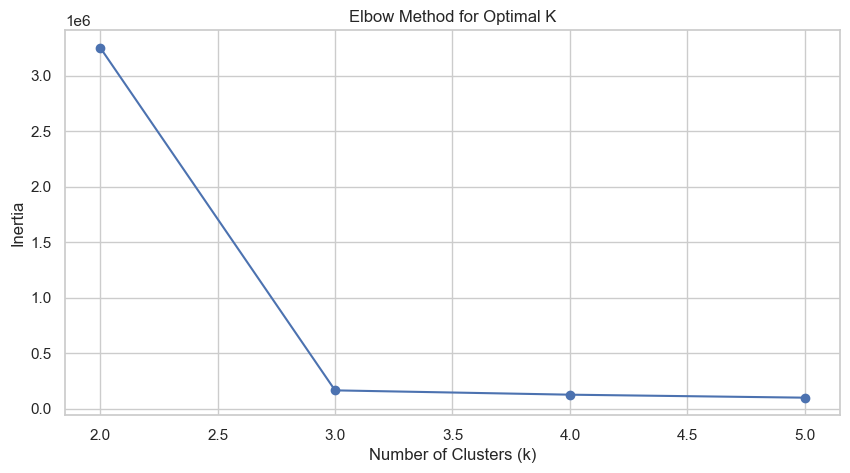

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Plot Silhouette Scores

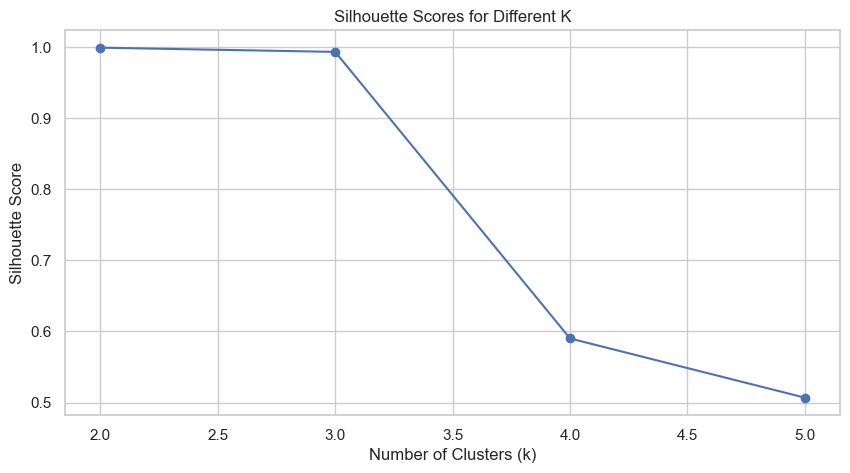

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Apply KMeans with optimal k (e.g., 3, adjust based on plots)


Cluster Distribution:
Cluster
0    1257
1       1
2       1
Name: count, dtype: int64


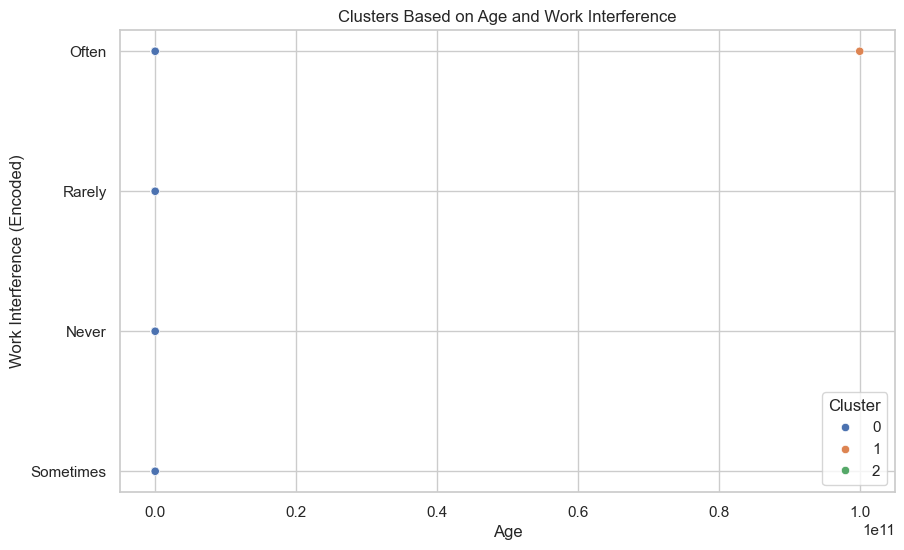

In [21]:
optimal_k = 3  # Example, adjust based on elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_features)
df['Cluster'] = pd.Series(cluster_labels, index=cluster_features.index)

# Analyze Clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Visualize Clusters (example with Age and Work Interference)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='work_interfere', hue='Cluster', data=df, palette='deep')
plt.title('Clusters Based on Age and Work Interference')
plt.xlabel('Age')
plt.ylabel('Work Interference (Encoded)')
plt.show()

# Data cleaning

### Handle Missing Values

In [22]:
# Replace "NA" with NaN
df.replace("NA", np.nan, inplace=True)

# Check missing value counts
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Drop rows where critical columns are missing (e.g., 'work_interfere', 'treatment')
df.dropna(subset=['work_interfere', 'treatment'], inplace=True)


Missing Values per Column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Cluster                         0
dtype: int64


#### Clean 'Age' Column

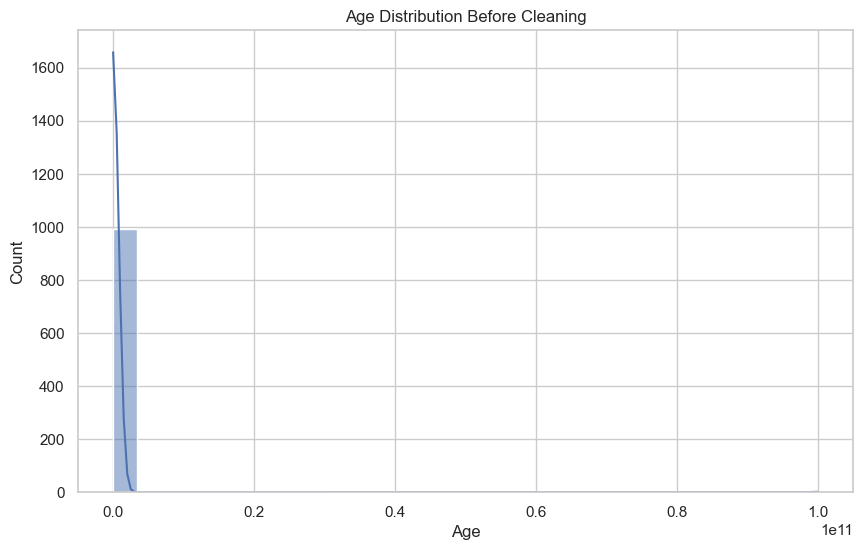

In [23]:
# Convert to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Visualize initial age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution Before Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Filter out invalid ages (e.g., < 0 or > 100)

In [24]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

#### Impute missing ages with median

/var/folders/n6/gfy6r49n33x38cdh5_g8gts00000gn/T/ipykernel_5578/3362438594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


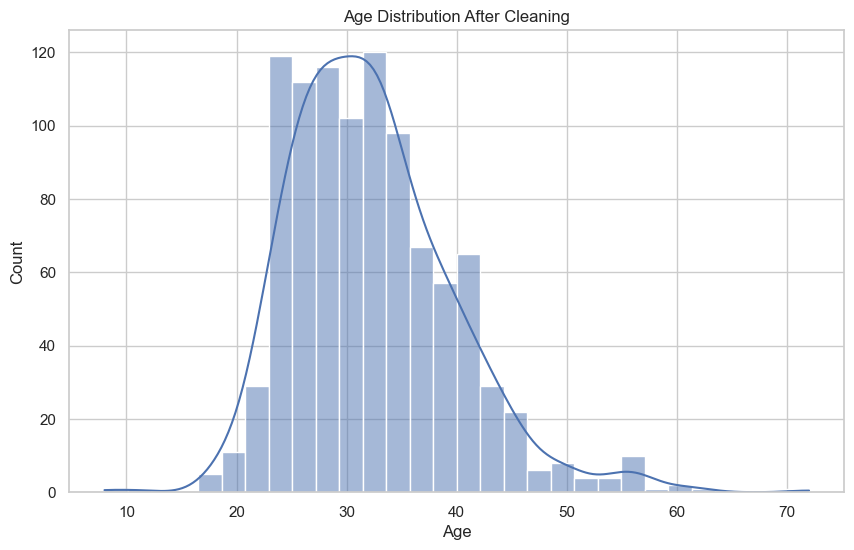

In [25]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Visualize cleaned age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Clean 'Gender' Column

In [26]:
# Standardize gender entries
def clean_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    gender = str(gender).lower().strip()
    if 'male' in gender or gender in ['m', 'maile', 'cis male']:
        return 'Male'
    elif 'female' in gender or gender in ['f', 'femail', 'cis female', 'woman']:
        return 'Female'
    else:
        return 'Other'  # For non-binary, trans, or unique responses

df['Gender'] = df['Gender'].apply(clean_gender)

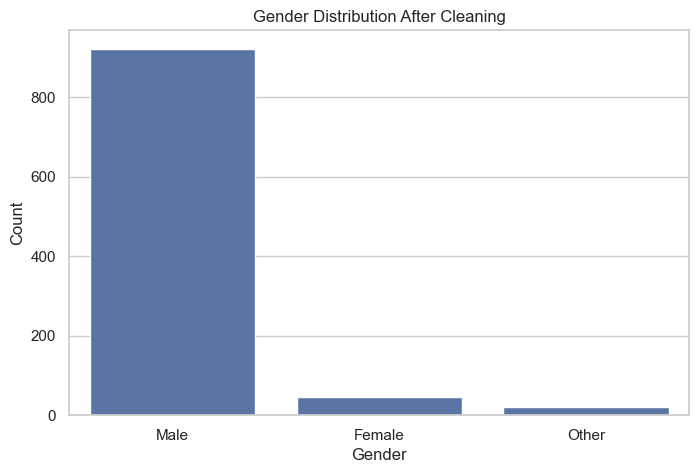

In [27]:
# Visualize gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution After Cleaning')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Handle Categorical Columns

In [28]:
# Replace "Don't know" with NaN in relevant columns
categorical_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 
                    'anonymity', 'leave', 'mental_health_consequence', 
                    'phys_health_consequence', 'mental_vs_physical']
df[categorical_cols] = df[categorical_cols].replace("Don't know", np.nan)

#### Convert Timestamp to Datetime

In [29]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

#### Check for Duplicates

In [30]:
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


##  Accuracy Tests

After cleaning, we test the data's accuracy by comparing the raw and cleaned datasets. Accuracy is evaluated through:

1. **Completeness**: Did we reduce missing values (NaN, "NA")?
2. **Consistency (Age)**: Were invalid ages (e.g., -29) removed?
3. **Consistency (Gender)**: Were gender variations standardized?
4. **Validity (Work Interference)**: Are categorical variables like `work_interfere` valid (no NaNs, expected categories)?
5. **Preservation (Treatment)**: Did cleaning preserve the distribution of key variables like `treatment`?





#### Statistical Models Used in the Study

1. Binary Logistic Regression  
2. Pearson’s Chi-Square Test  
3. Kruskal-Wallis Test
4. Confusion  Matrix


### 1. Binary Logistic Regression

**Purpose**:  
Assess the predictive accuracy of a binary outcome (e.g., whether an employee sought treatment) based on one or more predictor variables. This method evaluates how well the dataset explains relationships between variables, serving as an indicator of the data's reliability and strength in modeling categorical outcomes.


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings for simplicity

# Load dataset
try:
    df = pd.read_csv('survey (1).csv')
except FileNotFoundError:
    print("Error: 'survey (1).csv' not found. Please check the file path.")
    exit()

# Verify column existence
if 'treatment' not in df.columns:
    print("Error: Column 'treatment' not found. Available columns:", df.columns.tolist())
    exit()
print("Columns:", df.columns.tolist())

# Preprocessing
# 1. Clean Age
df = df[df['Age'].between(18, 100)]

# 2. Standardize Gender
df['Gender'] = df['Gender'].str.lower().replace({
    'male': 'Male', 'm': 'Male', 'cis male': 'Male',
    'female': 'Female', 'f': 'Female', 'femail': 'Female', 'woman': 'Female', 'cis female': 'Female'
}).fillna('Other')
df['Gender'] = df['Gender'].apply(lambda x: 'Other' if x not in ['Male', 'Female'] else x)

# 3. Encode categorical variables
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['benefits'] = df['benefits'].map({'Yes': 1, 'No': 0, 'Don\'t know': 2})
df['work_interfere'] = df['work_interfere'].map({
    'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3
}).fillna(0)

# 4. Prepare features and target
features = ['Age', 'Gender', 'family_history', 'work_interfere', 'benefits', 'treatment']
df = df[features].dropna()
X = df.drop(columns=['treatment'])
y = df['treatment']

# 5. Encode Gender
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Fit model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 8. Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])

# 9. Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC-ROC: {auc:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Class distribution
print("\nClass Distribution in Target (treatment):")
print(df['treatment'].value_counts(normalize=True))

Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Logistic Regression Results:
Accuracy: 0.80
AUC-ROC: 0.85
Confusion Matrix:
 [[ 83  30]
 [ 20 118]]
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.73      0.77       113
         Yes       0.80      0.86      0.83       138

    accuracy                           0.80       251
   macro avg       0.80      0.79      0.80       251
weighted avg       0.80      0.80      0.80       251

Cross-Validation Accuracy: 0.82 ± 0.02

Coefficients:
Age: 0.0336
family_history: 1.0828
work_interfere:

### 2. Pearson’s Chi-Square Test

**Purpose**:  
Test for independence between categorical variables to assess data consistency. Significant associations suggest the data captures meaningful relationships, which supports the accuracy and validity of the dataset.


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Load dataset
try:
    df = pd.read_csv('survey (1).csv')
except FileNotFoundError:
    print("Error: 'survey (1).csv' not found. Please check the file path.")
    exit()

# Verify column existence
required_columns = ['treatment', 'benefits']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing columns: {missing}. Available columns: {df.columns.tolist()}")
    exit()
print("Columns:", df.columns.tolist())

# Preprocessing
# 1. Select relevant columns and drop missing values
df = df[['treatment', 'benefits']].dropna()

# 2. Standardize categories (optional, as dataset values are typically consistent)
df['treatment'] = df['treatment'].str.strip().replace({'Yes': 'Yes', 'No': 'No'})
df['benefits'] = df['benefits'].str.strip().replace({
    'Yes': 'Yes', 'No': 'No', 'Don\'t know': 'Don’t know'
})

# 3. Create contingency table
contingency_table = pd.crosstab(df['treatment'], df['benefits'])

# 4. Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 5. Check Chi-Square assumptions (expected frequencies > 5)
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
if (expected < 5).any().any():
    print("Warning: Some expected frequencies are < 5, which may affect test reliability.")

# 6. Print results
print("\nPearson’s Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nContingency Table (Observed Frequencies):")
print(contingency_table)
print("\nExpected Frequencies:")
print(expected_df.round(2))
print("\nInterpretation:")
if p < 0.05:
    print("Significant association between treatment and benefits (p < 0.05).")
else:
    print("No significant association between treatment and benefits (p >= 0.05).")

# 7. Additional insight: Proportion of treatment by benefits
proportions = df.groupby('benefits')['treatment'].value_counts(normalize=True).unstack()
print("\nProportion of Treatment by Benefits:")
print(proportions.round(2))

Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Pearson’s Chi-Square Test Results:
Chi-Square Statistic: 64.84
p-value: 0.0000
Degrees of Freedom: 2

Contingency Table (Observed Frequencies):
benefits   Don’t know   No  Yes
treatment                      
No                257  193  172
Yes               151  181  305

Expected Frequencies:
benefits   Don’t know      No     Yes
treatment                            
No             201.57  184.77  235.66
Yes            206.43  189.23  241.34

Interpretation:
Significant association between treatment and benefits (p < 0.05).

Proportion of Treatment

### 3. Kruskal-Wallis Test

**Purpose**:  
Test for differences in an ordinal variable (e.g., leave difficulty) across groups (e.g., no_employees categories). This non-parametric method assesses whether the data captures group differences reliably, even when the assumptions of normality are not met.


In [34]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np

# Load dataset
try:
    df = pd.read_csv('survey (1).csv')
except FileNotFoundError:
    print("Error: 'survey (1).csv' not found. Please check the file path.")
    exit()

# Verify column existence
required_columns = ['leave', 'no_employees']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    print(f"Error: Missing columns: {missing}. Available columns: {df.columns.tolist()}")
    exit()
print("Columns:", df.columns.tolist())

# Preprocessing
# 1. Encode leave ordinally
df['leave'] = df['leave'].str.strip().map({
    'Very easy': 1, 'Somewhat easy': 2, 'Don’t know': 3,
    'Somewhat difficult': 4, 'Very difficult': 5
})

# 2. Select relevant columns and drop missing values
df = df[['leave', 'no_employees']].dropna()

# 3. Check group sizes
group_sizes = df['no_employees'].value_counts()
print("\nGroup Sizes (no_employees):")
print(group_sizes)
if any(group_sizes < 5):
    print("Warning: Some no_employees categories have < 5 observations, which may affect test reliability.")

# 4. Group data by no_employees
groups = [df[df['no_employees'] == cat]['leave'].dropna() for cat in df['no_employees'].unique()]

# 5. Perform Kruskal-Wallis Test
stat, p = kruskal(*groups)

# 6. Calculate median leave scores per group
medians = {cat: df[df['no_employees'] == cat]['leave'].median() for cat in df['no_employees'].unique()}
ranks = {cat: df[df['no_employees'] == cat]['leave'].mean() for cat in df['no_employees'].unique()}  # Mean ranks for insight

# 7. Print results
print("\nKruskal-Wallis Test Results:")
print(f"Kruskal-Wallis Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print("\nMedian Leave Scores by no_employees:")
for cat, median in medians.items():
    print(f"{cat}: {median:.1f}")
print("\nMean Ranks by no_employees:")
for cat, rank in ranks.items():
    print(f"{cat}: {rank:.2f}")
print("\nInterpretation:")
if p < 0.05:
    print("Significant differences in leave difficulty across company sizes (p < 0.05).")
else:
    print("No significant differences in leave difficulty across company sizes (p >= 0.05).")

Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Group Sizes (no_employees):
no_employees
6-25              179
26-100            154
More than 1000    128
1-5               119
100-500            90
500-1000           26
Name: count, dtype: int64

Kruskal-Wallis Test Results:
Kruskal-Wallis Statistic: 6.59
p-value: 0.2532

Median Leave Scores by no_employees:
6-25: 2.0
26-100: 2.0
1-5: 2.0
100-500: 2.0
More than 1000: 2.0
500-1000: 2.0

Mean Ranks by no_employees:
6-25: 2.30
26-100: 2.43
1-5: 2.77
100-500: 2.52
More than 1000: 2.59
500-1000: 2.19

Interpretation:
No significant differences in lea

### 4. Confusion Matrix


Final Accuracy of Neural Network: 0.80
Precision: 0.80
Recall: 0.86
F1 Score: 0.83


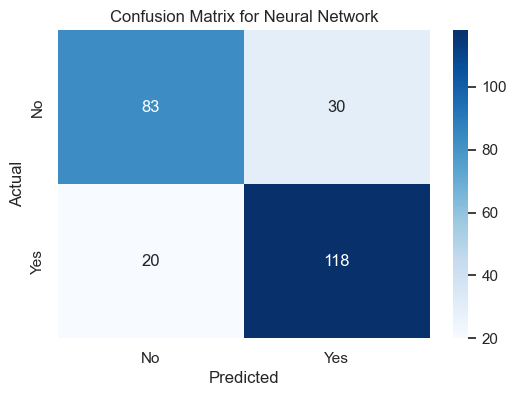

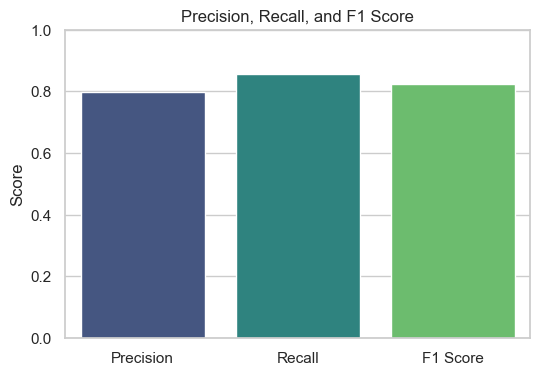

In [47]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

# Printing the metrics
print(f"Final Accuracy of Neural Network: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Neural Network')
plt.show()

# Bar chart of Precision, Recall, F1-score
plt.figure(figsize=(6,4))
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0,1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.show()


## Exploratory Data Analysis (EDA)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('survey (1).csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  
df = df[df['Age'].between(18, 70)]  

# Convert 'remote_work' to binary
df['remote_work'] = df['remote_work'].map({'Yes': 1, 'No': 0})

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 70], 
                         labels=['18-29', '30-39', '40-49', '50+'])

# Standardize gender categories
df['Gender'] = df['Gender'].str.lower().str.strip()
male_terms = ['male', 'm', 'male-ish', 'maile', 'mal', 'make', 'male (cis)']
female_terms = ['female', 'f', 'woman', 'femake', 'cis female', 'femail']
df['gender_group'] = np.where(df['Gender'].isin(male_terms), 'Male',
                             np.where(df['Gender'].isin(female_terms), 'Female', 'Other'))

# Create a binary treatment variable
df['received_treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

***Question 1***. Employment Patterns and Labor Force Dynamics

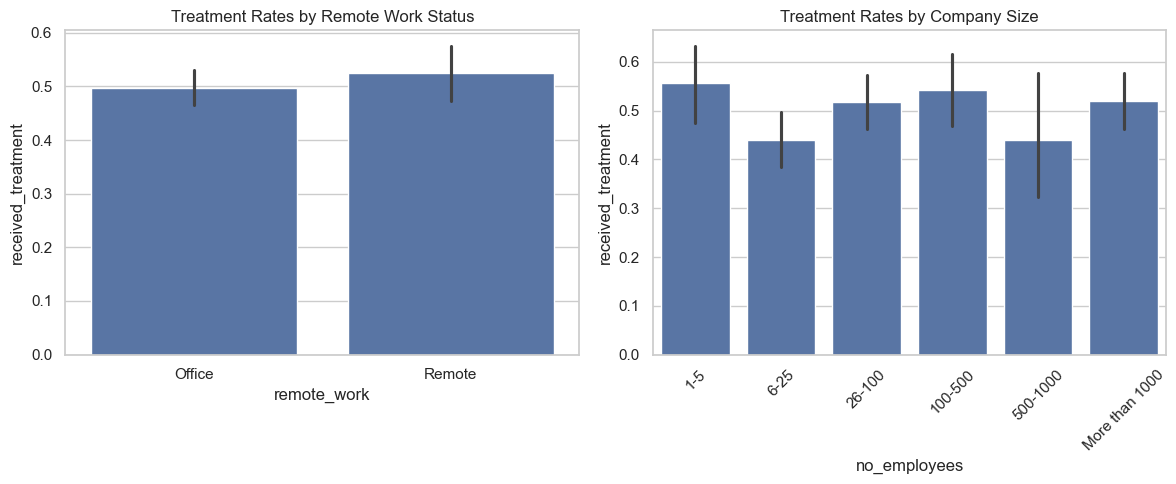

In [36]:
# Remote work analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='remote_work', y='received_treatment', data=df)
plt.title('Treatment Rates by Remote Work Status')
plt.xticks([0, 1], ['Office', 'Remote'])

# Company size analysis
plt.subplot(1, 2, 2)
company_size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
sns.barplot(x='no_employees', y='received_treatment', data=df, order=company_size_order)
plt.title('Treatment Rates by Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Questions 2*** Policy and Practice Interventions

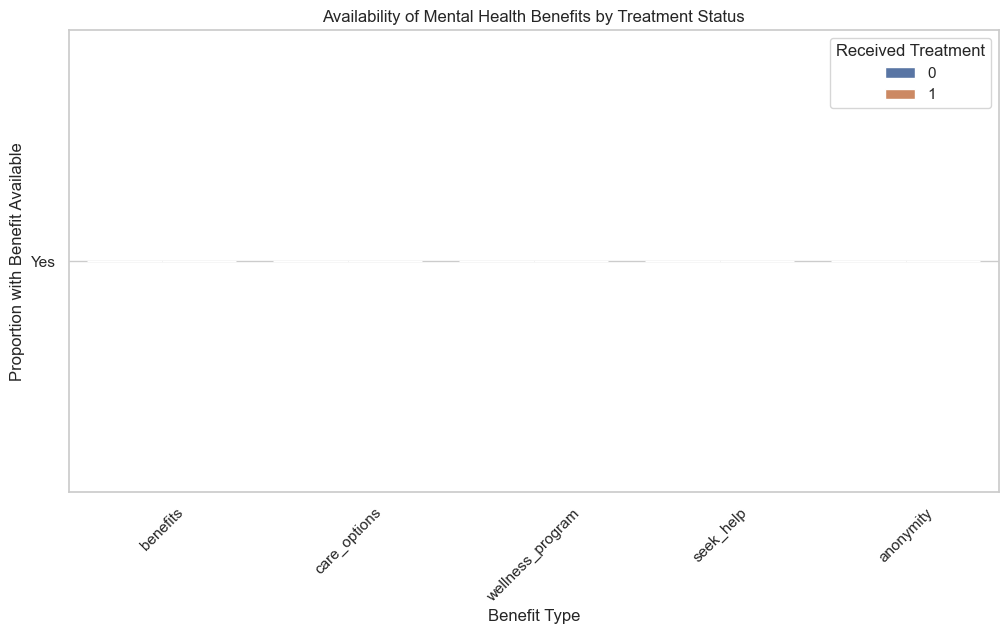

In [37]:
# Workplace benefits analysis
benefit_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
benefit_data = df[benefit_cols + ['received_treatment']].melt(id_vars='received_treatment')

plt.figure(figsize=(12, 6))
sns.barplot(x='variable', y='value', hue='received_treatment', 
            data=benefit_data, estimator=lambda x: sum(x=='Yes')/len(x))
plt.title('Availability of Mental Health Benefits by Treatment Status')
plt.ylabel('Proportion with Benefit Available')
plt.xlabel('Benefit Type')
plt.xticks(rotation=45)
plt.legend(title='Received Treatment')
plt.show()

***Question 3*** Diverse Worker Populations

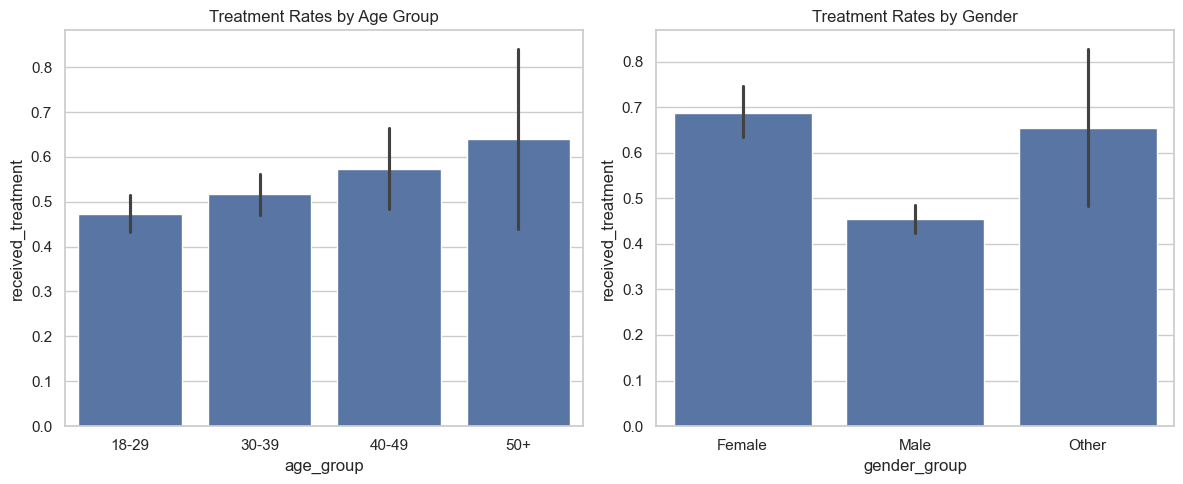

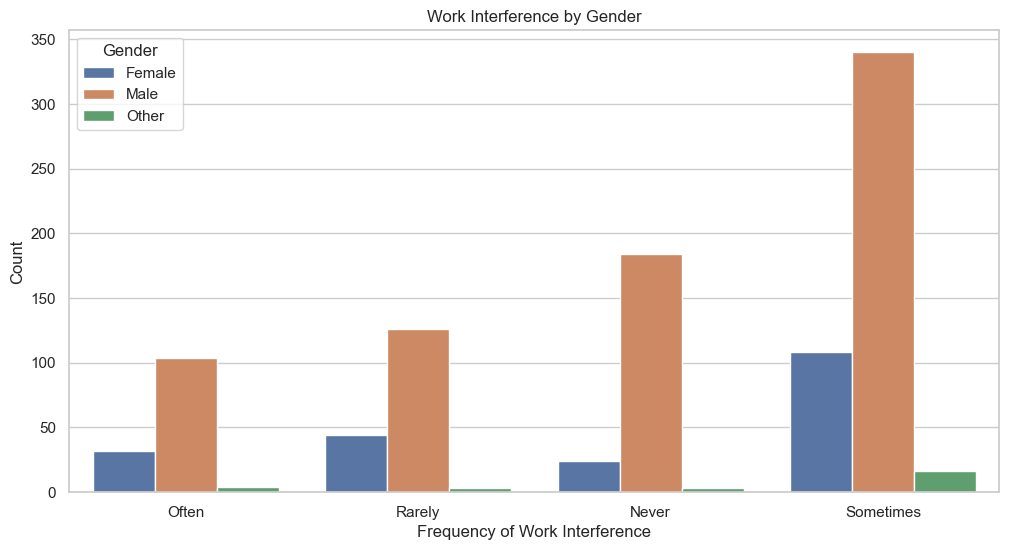

In [38]:
# Age and gender analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='age_group', y='received_treatment', data=df)
plt.title('Treatment Rates by Age Group')

plt.subplot(1, 2, 2)
sns.barplot(x='gender_group', y='received_treatment', data=df)
plt.title('Treatment Rates by Gender')
plt.tight_layout()
plt.show()

# Work interference by demographics
plt.figure(figsize=(12, 6))
sns.countplot(x='work_interfere', hue='gender_group', data=df)
plt.title('Work Interference by Gender')
plt.xlabel('Frequency of Work Interference')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#### Age Distribution
  Employment Patterns and Labor Force Dynamics

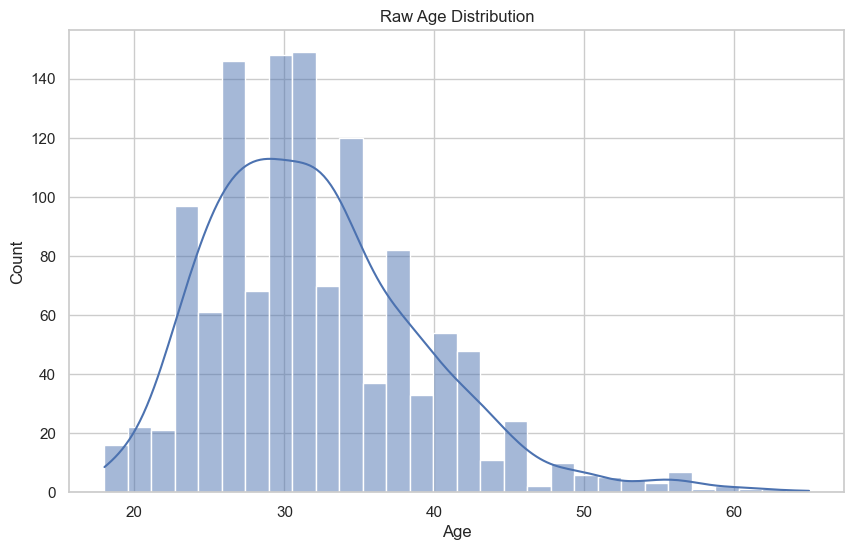

In [39]:
plt.figure(figsize=(10, 6))
# Convert Age to numeric, coercing errors to NaN for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Raw Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Check for anomalies

In [40]:
print("\nAge Anomalies:")
print("Negative Ages:", df[df['Age'] < 0]['Age'].count())
print("Ages > 100:", df[df['Age'] > 100]['Age'].count())


Age Anomalies:
Negative Ages: 0
Ages > 100: 0


#### Gender Distribution

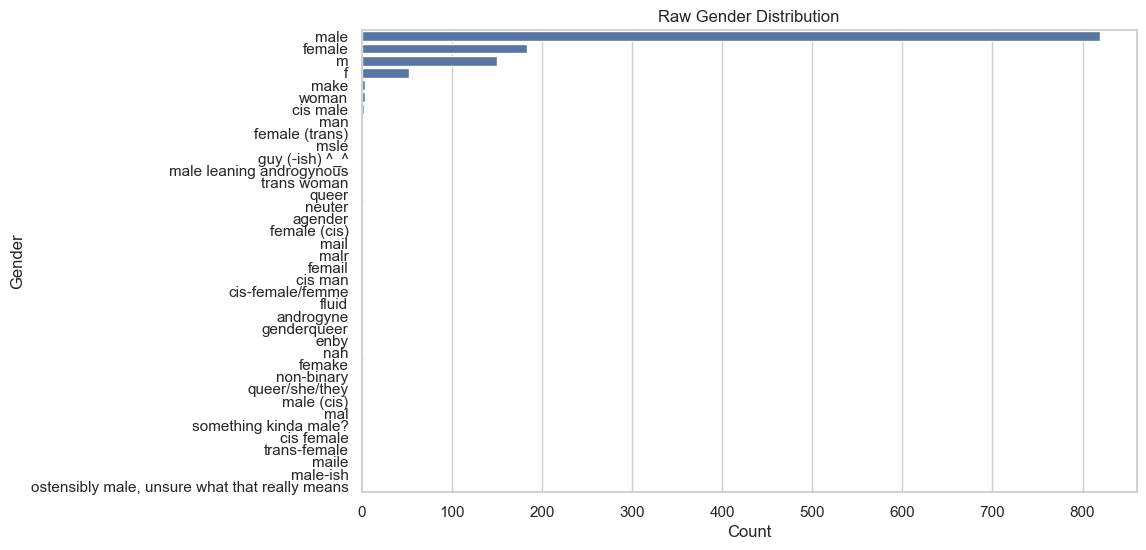

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title('Raw Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

#### Work Interference

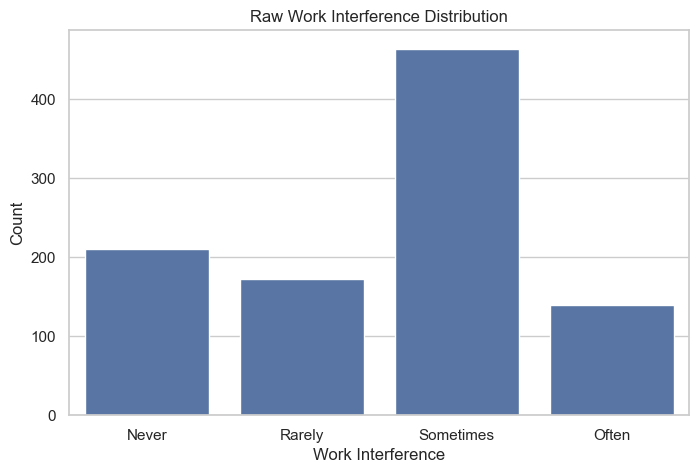

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='work_interfere', data=df, order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title('Raw Work Interference Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

#### Treatment Seeking

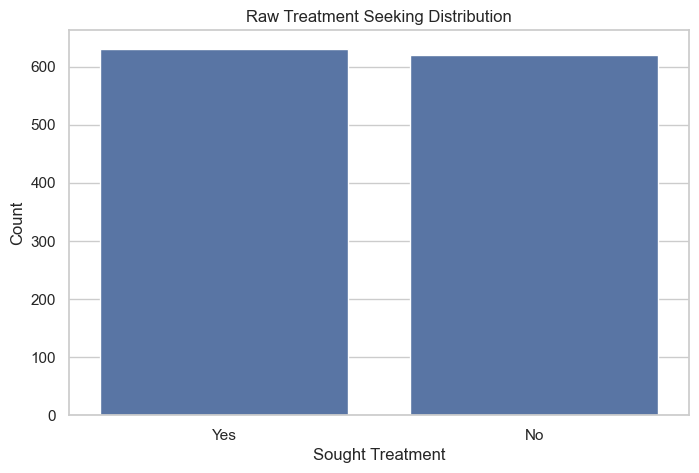

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=df)
plt.title('Raw Treatment Seeking Distribution')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.show()

#### Country Distribution

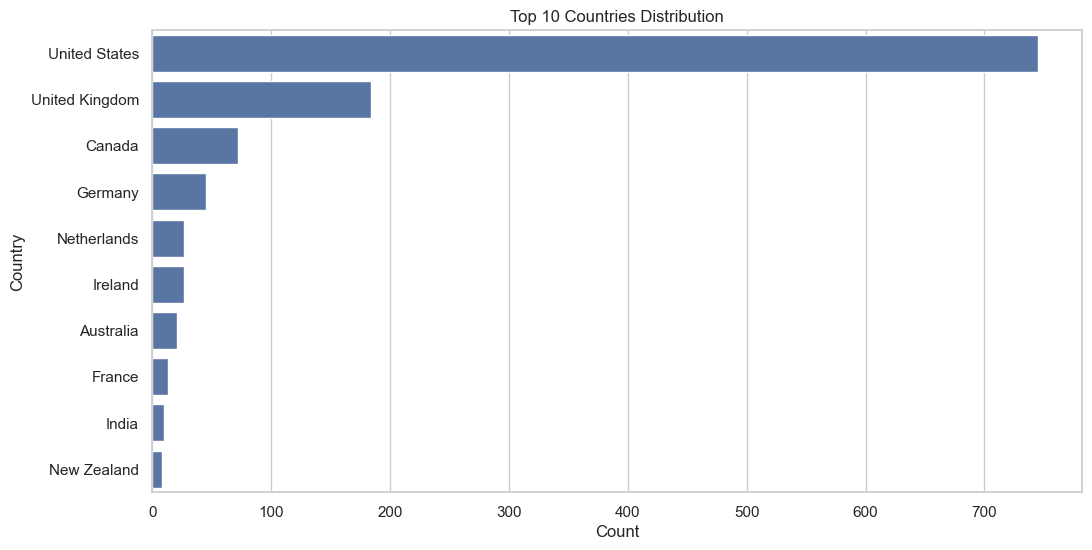

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#### Treatment vs. Family History

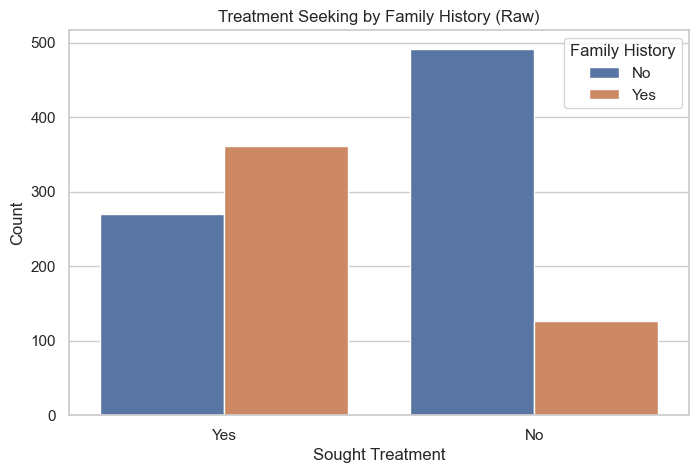

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Treatment Seeking by Family History (Raw)')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.show()

#### Work Interference vs. Mental Health Consequence

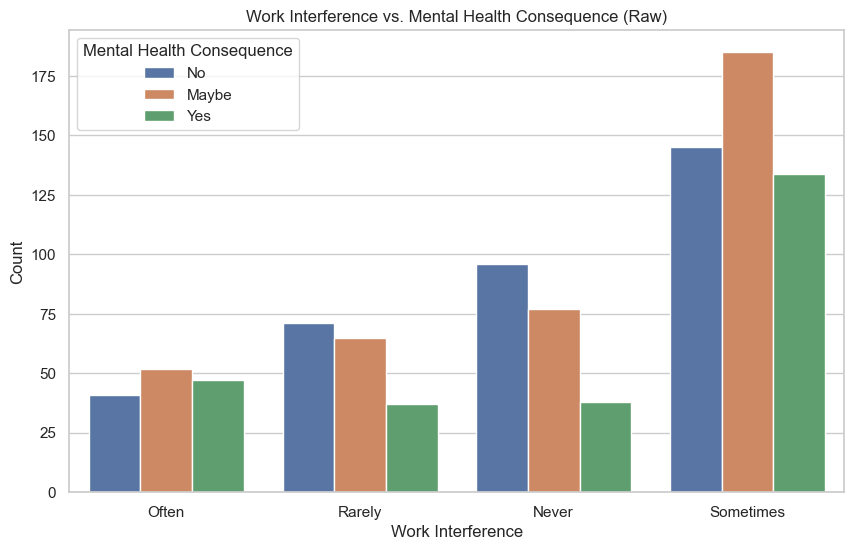

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_interfere', hue='mental_health_consequence', data=df)
plt.title('Work Interference vs. Mental Health Consequence (Raw)')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Mental Health Consequence')
plt.show()